## THE SPARK FOUNDATION (GRIP) INTERNSHIP PROJECT (TASK 4)

# THE AIM OF THIS PROJECT IS TO FIND OUT THE HOT ZONE OF TERRORISM AS A DEFENSE ANALYST AND FIND INSIGHT OF ISSUES CAUSING TERRORISM USING EXPLORATION DATA ANALYSIS ( EDA )

## IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'globalterrorismdb_0718dist.csv'

In [3]:
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [4]:
data = pd.read_csv(file,encoding='ISO-8859-1', low_memory=False)

In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
data.shape

(181691, 135)

In [9]:
data.duplicated().sum()

0

In [10]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Drop The ("EventId", "approxdate", "related") Column

In [11]:
data.drop(['eventid', 'approxdate', 'related'], axis=1, inplace=True)

In [12]:
data.head()

,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,provstate,...,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,1970,0,0,0,NaN,130,Mexico,1,North America,Federal,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1
2,1970,1,0,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,1970,1,0,0,NaN,78,Greece,8,Western Europe,Attica,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,1970,1,0,0,NaN,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1


Data Exploration

In [13]:
display(f'Countries with most attacks : {data.country.value_counts().idxmax()}')
display(f'City with most attacks : {data.city.value_counts().index[1]}')
display(f'Regions with most attacks : {data.region_txt.value_counts().idxmax()}')
display(f'Year with most attacks : {data.iyear.value_counts().idxmax()}')
display(f'Month with most attacks : {data.imonth.value_counts().idxmax()}')
display(f'Groups with most attacks : {data.gname.value_counts().index[1]}')
display(f'Most attack Types : {data.attacktype1_txt.value_counts().idxmax()}')

'Countries with most attacks : 95'

'City with most attacks : Baghdad'

'Regions with most attacks : Middle East & North Africa'

'Year with most attacks : 2014'

'Month with most attacks : 5'

'Groups with most attacks : Taliban'

'Most attack Types : Bombing/Explosion'

The Above Code Review Countries, Cit, Regons, Year, Month, Groups the terrorist attacks the most

Visualizing The Cities Under Terrorist Attack

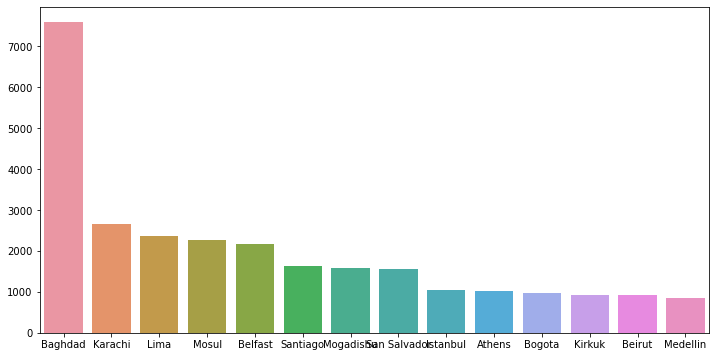

In [14]:
plt.subplots(figsize=(12,6))
sns.barplot(x=data.city.value_counts()[1:15].index, y=data.city.value_counts()[1:15].values, data=data)
plt.show()

The Above Visualization Indicates That "Badhdad" was the most attacked city by the Terrorist

In [15]:
data.isna().sum()

iyear              0
imonth             0
iday               0
extended           0
resolution    179471
               ...  
dbsource           0
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
Length: 132, dtype: int64

In [16]:
data.head()

,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,provstate,...,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,1970,0,0,0,NaN,130,Mexico,1,North America,Federal,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1
2,1970,1,0,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,1970,1,0,0,NaN,78,Greece,8,Western Europe,Attica,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,1970,1,0,0,NaN,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1


In [17]:
df = data.dropna(axis=1)

In [18]:
df.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,crit1,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,1,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,1970,0,0,0,130,Mexico,1,North America,0,1,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,1970,1,0,0,160,Philippines,5,Southeast Asia,0,1,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,1970,1,0,0,78,Greece,8,Western Europe,0,1,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,1970,1,0,0,101,Japan,4,East Asia,0,1,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [19]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'vicinity', 'crit1', 'crit2', 'crit3',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'gname', 'individual', 'weaptype1', 'weaptype1_txt',
       'property', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [20]:
df.isna().sum()

iyear              0
imonth             0
iday               0
extended           0
country            0
country_txt        0
region             0
region_txt         0
vicinity           0
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
targtype1_txt      0
gname              0
individual         0
weaptype1          0
weaptype1_txt      0
property           0
dbsource           0
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
dtype: int64

<!-- Visualizing The Country the terrorist Attacks the most -->

In [21]:
df.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,crit1,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,1,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,1970,0,0,0,130,Mexico,1,North America,0,1,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,1970,1,0,0,160,Philippines,5,Southeast Asia,0,1,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,1970,1,0,0,78,Greece,8,Western Europe,0,1,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,1970,1,0,0,101,Japan,4,East Asia,0,1,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


Terrorism In Regions

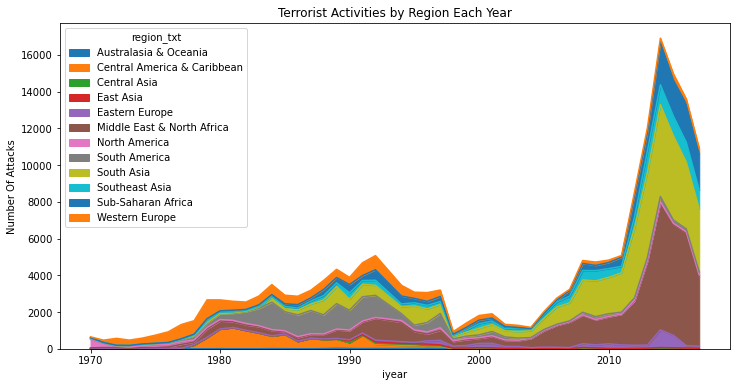

In [22]:
pd.crosstab(df['iyear'], df['region_txt']).plot(kind='area', figsize=(12,6))
plt.title('Terrorist Activities by Region Each Year')
plt.ylabel('Number Of Attacks')
plt.show()

In [23]:
df.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,crit1,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,1,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,1970,0,0,0,130,Mexico,1,North America,0,1,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,1970,1,0,0,160,Philippines,5,Southeast Asia,0,1,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,1970,1,0,0,78,Greece,8,Western Europe,0,1,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,1970,1,0,0,101,Japan,4,East Asia,0,1,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


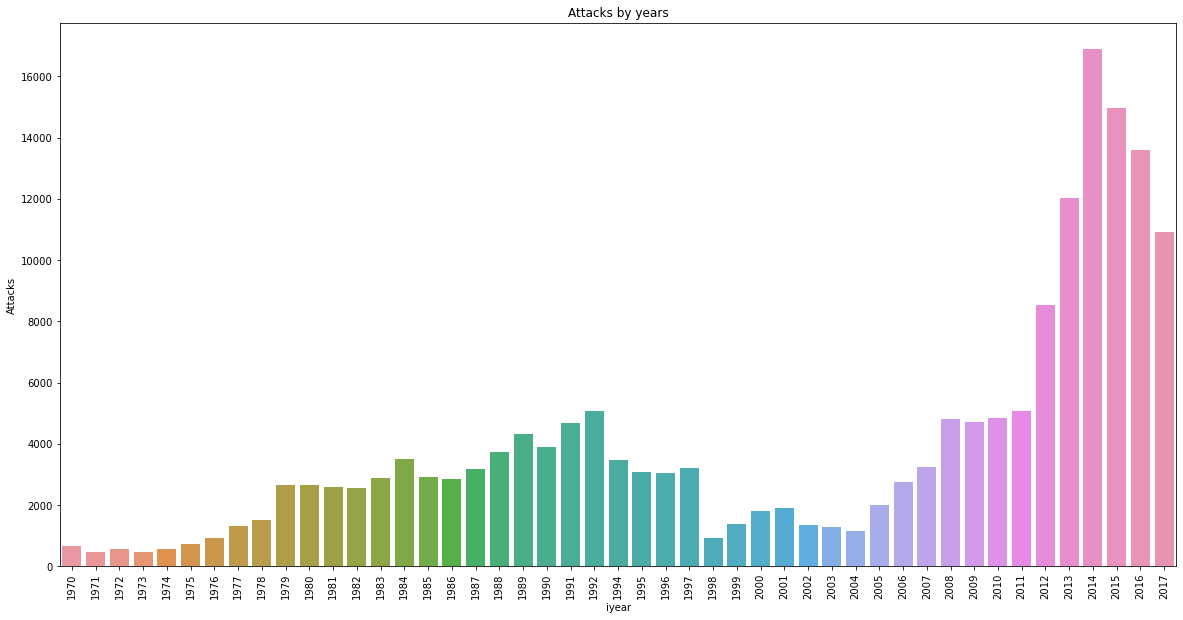

In [35]:
plt.subplots(figsize=(20, 10))
sns.countplot(x='iyear', data=df)
plt.title('Attacks by years')
plt.ylabel('Attacks')
plt.xticks(rotation=(90))
plt.show()

The Terrorist Attacks The Most In 2014

In [25]:
df.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,crit1,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,1,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,1970,0,0,0,130,Mexico,1,North America,0,1,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,1970,1,0,0,160,Philippines,5,Southeast Asia,0,1,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,1970,1,0,0,78,Greece,8,Western Europe,0,1,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,1970,1,0,0,101,Japan,4,East Asia,0,1,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


Weapons Used By The Terrorist

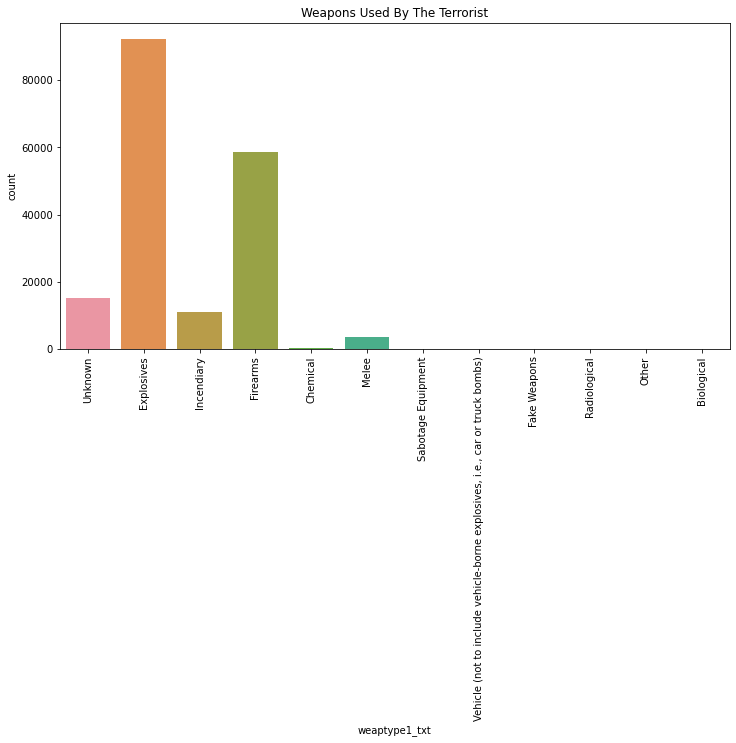

In [36]:
plt.subplots(figsize=(12, 6))
sns.countplot(x='weaptype1_txt', data=df)
plt.title('Weapons Used By The Terrorist')
plt.xticks(rotation=(90))
plt.show()

Terrorists Used Explosives and Firearms for the attack

In [27]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'vicinity', 'crit1', 'crit2', 'crit3',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'gname', 'individual', 'weaptype1', 'weaptype1_txt',
       'property', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

Visualizing The Terrorist Main Target

In [28]:
df['targtype1_txt']

0         Private Citizens & Property
1             Government (Diplomatic)
2                 Journalists & Media
3             Government (Diplomatic)
4             Government (Diplomatic)
                     ...             
181686                       Military
181687                       Military
181688    Private Citizens & Property
181689           Government (General)
181690                        Unknown
Name: targtype1_txt, Length: 181691, dtype: object

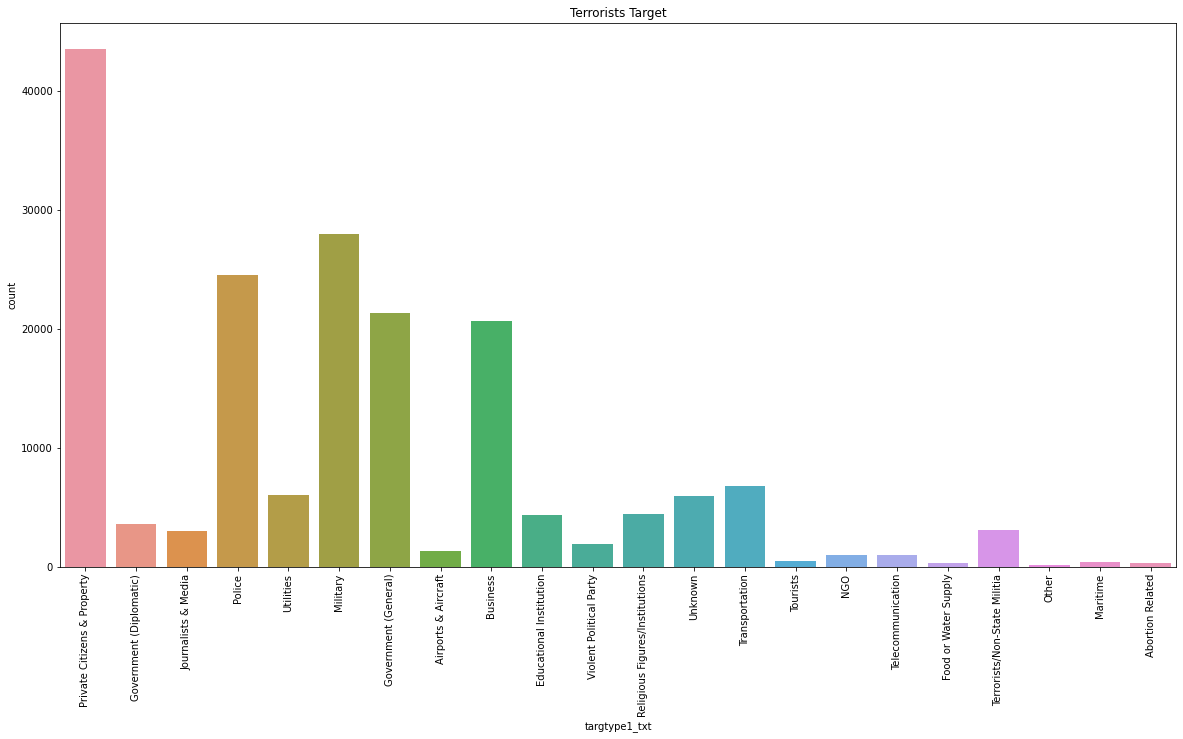

In [29]:
plt.subplots(figsize=(20, 10))
sns.countplot(x='targtype1_txt', data=df)
plt.title('Terrorists Target')
plt.xticks(rotation=(90))
plt.show()

The Above Plot Explains that Private Citizens & The Military are their main Target

Visualizing The Groups the Terrorists atacks the most

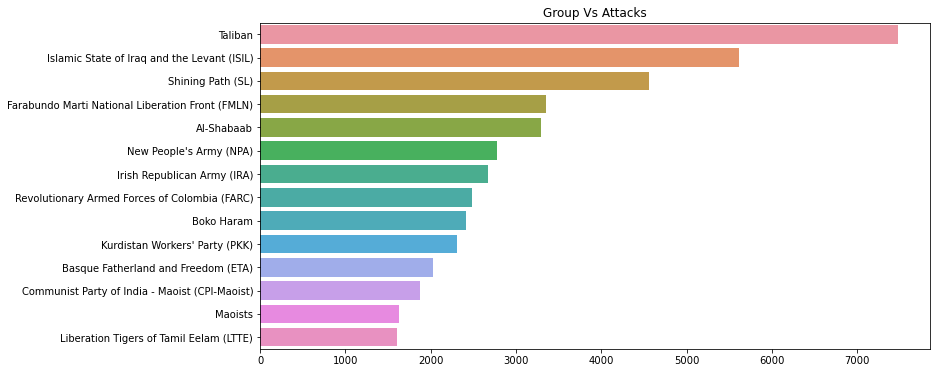

In [30]:
plt.subplots(figsize=(12,6))
sns.barplot(x=df.gname.value_counts()[1:15].values, y=df.gname.value_counts()[1:15].index, data=df)
plt.title('Group Vs Attacks')
plt.show()

The Above plot explains that the terrorist attacks The Talibans & The Islamic Society Of Iraq and the Levant(ISIL) group the most

In [32]:
data.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'resolution', 'country',
       'country_txt', 'region', 'region_txt', 'provstate',
       ...
       'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource',
       'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object', length=132)

In [33]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'vicinity', 'crit1', 'crit2', 'crit3',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'gname', 'individual', 'weaptype1', 'weaptype1_txt',
       'property', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

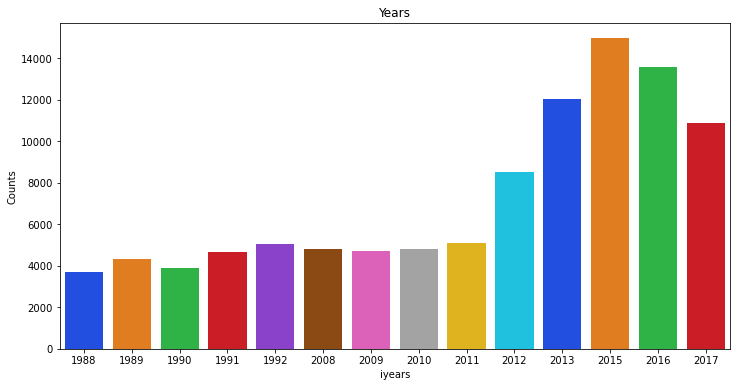

In [34]:
plt.subplots(figsize=(12,6))
sns.barplot(x=df.iyear.value_counts()[1:15].index, y=df.iyear.value_counts()[1:15].values, data=df, palette='bright')
plt.title('Years')
plt.xlabel('iyears')
plt.ylabel('Counts')
plt.show()

As a Defense Analyst, The Insights i got from the EDA are :

1. Terrorist attack increase in recent years.
2. City with the highest attack is Baghdad.
3. MiddleEast & North Africa Regions are having the highest numbers of attack by the terrorist.
4. Terrorist main targets are the Private citizens and the Military.
5. The Talibans & The Islamic society Of Iraq has the highest number of attack.
6. The weapons used by the Terrorist for attack is Explosives & Firearm.
7. 2014 is the year that has the highest number of attacks.